In [1]:
# conda install pytorch torchvision -c pytorch

In [2]:
# conda install -c fastai fastai


In [3]:
# conda install -c pytorch pytorch 

In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [5]:
#export
from exp.nb_00 import *
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

In [6]:
test_eq(TEST,'test')

In [7]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [8]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path


PosixPath('/Users/clarisa/.fastai/data/mnist.pkl.gz')

In [9]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')


In [10]:
# maps the pytorch tensor function against each
# of the loaded arrays to make pytorch versions of them
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))

# store the number of 
# n = rows
# c = columns
n,c = x_train.shape

# take a look at the values and the shapes
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [11]:
img = x_train[9]

In [12]:
mpl.rcParams['image.cmap'] = 'gray'

In [13]:
img.view((28,28)).type()

'torch.FloatTensor'

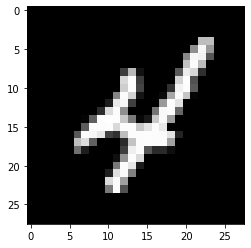

In [14]:
plt.imshow(img.view((28,28)));


In [15]:
x_train.t().shape

torch.Size([784, 50000])

In [16]:
x_train.shape

torch.Size([50000, 784])

In [17]:
x_train.t().shape

torch.Size([784, 50000])

In [18]:
x_train = x_train.t().clone()

In [19]:
x_train.shape

torch.Size([784, 50000])

In [20]:
bias = torch.zeros(10)

In [21]:
bias

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
weights = torch.randn(10,784)

In [23]:
x,y =weights.shape;
x,y

(10, 784)

In [24]:
def mat_mult(w,x):
    wr, wc = w.shape
    xr, xc = x.shape

    assert wc == xr
    out = torch.zeros(wr,xc)
    
    for i in range(wr):
        for j in range(xc):
            for k in range(wc):
                out[i,j] += w[i,k] * x[k,j]
    return out

In [25]:
inp1 = x_train[:,0:7]
w1 = weights
w1.shape, inp1.shape

(torch.Size([10, 784]), torch.Size([784, 7]))

In [26]:
inp1.shape

torch.Size([784, 7])

In [27]:
%time t1 = mat_mult(w1,inp1)

CPU times: user 958 ms, sys: 1.9 ms, total: 960 ms
Wall time: 964 ms


Try element-wise operations

In [28]:
def mat_mult(w,x):
    wr, wc = w.shape
    xr, xc = x.shape

    assert wc == xr
    out = torch.zeros(wr,xc)
    
    for i in range(wr):
        for j in range(xc):
            out[i,j] = (w[i] * x[:,j]).sum()
    return out

In [29]:
%timeit -n 10 _= mat_mult(w1,inp1)

1.27 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Try broadcasting

In [30]:
inp1[0];

In [31]:
inp1[0].unsqueeze(-1);

In [32]:
import os
cwd = os.getcwd()
cwd

'/Users/clarisa/Documents/fast_ai/course-v3-master/nbs/dl2'

In [33]:
from IPython.display import Image

In [34]:
# Image(cwd + "/images/" + "dude_wtf_1.png", width = 500)

In [35]:
def mat_mult(w,x):
    wr, wc = w.shape
    xr, xc = x.shape

    assert wc == xr
    out = torch.zeros(wr,xc)
    
    for i in range(wr):
        out[i] = (w[i].unsqueeze(-1) * x).sum(dim=0)
    return out

In [36]:
A = torch.arange(10.0).reshape(2,5)
B =A.t()

In [37]:
mat_mult(B,A) - B@A

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [38]:
A

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

In [39]:
B

tensor([[0., 5.],
        [1., 6.],
        [2., 7.],
        [3., 8.],
        [4., 9.]])

In [40]:
B[:, 0].expand_as(A)

tensor([[0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.]])

In [41]:
(B[:, 0] * A.unsqueeze(1)).sum(axis=0)

tensor([[ 0.,  7., 18., 33., 52.]])

In [42]:
B[:, 1].expand_as(A)

tensor([[5., 6., 7., 8., 9.],
        [5., 6., 7., 8., 9.]])

In [43]:
(B[:, 1] * A.unsqueeze(1)).sum(axis=0)

tensor([[ 25.,  42.,  63.,  88., 117.]])

In [44]:
A@B

tensor([[ 30.,  80.],
        [ 80., 255.]])

In [45]:
B@A

tensor([[25., 30., 35., 40., 45.],
        [30., 37., 44., 51., 58.],
        [35., 44., 53., 62., 71.],
        [40., 51., 62., 73., 84.],
        [45., 58., 71., 84., 97.]])

In [46]:
%time t3 = mat_mult(w1,inp1)

CPU times: user 649 µs, sys: 430 µs, total: 1.08 ms
Wall time: 661 µs


In [47]:
#export
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

In [48]:
j = inp1.t()@w1.t()

In [49]:
j.shape,t3.shape

(torch.Size([7, 10]), torch.Size([10, 7]))

In [50]:
test_near(t3, j.t())

Okay now we try einsum..

In [51]:
def mat_mult(w,x): return torch.einsum("ik,kj->ij",w,x).t()

In [52]:
%timeit -n 10 _= mat_mult(w1,inp1)

The slowest run took 27.06 times longer than the fastest. This could mean that an intermediate result is being cached.
203 µs ± 375 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [58]:
test_near(j,mat_mult(w1,inp1))

In [59]:
!python notebook2script.py 01_matmul_OMO.ipynb

Converted 01_matmul_OMO.ipynb to exp/nb_01.py
